In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
data_humans = pd.read_csv('forms.csv', index_col='Unnamed: 0')
data_llm = pd.read_csv('formsYA.csv', index_col='Unnamed: 0')

In [ ]:
data_humans

,word,valence_1,arousal_1,valence_2,arousal_2,valence_3,arousal_3,valence_4,arousal_4,valence_5,arousal_5,valence_6,arousal_6
0,антипатия,1,3,3,7,1,4,3,4,2,1,3,7
1,апатия,5,1,2,4,1,1,2,3,1,4,2,8
2,азарт,7,7,5,9,8,9,8,9,9,10,5,6
3,ажиотаж,4,8,3,8,8,10,7,5,4,1,8,8
4,бешенство,1,10,1,10,1,10,5,6,5,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,зависть,3,8,2,7,2,7,1,1,2,6,3,7
102,жалость,6,6,2,4,3,5,1,4,1,8,4,3
103,желание,6,8,6,8,8,7,7,10,7,7,7,10
104,злоба,2,9,1,10,3,8,2,9,1,9,3,7


In [ ]:
print(str(list(data_humans.iloc[:,0])).replace("'", ""))

[антипатия, апатия, азарт, ажиотаж, бешенство, беспамятство, беспокойство, безнадежность, безысходность, благодарность, блаженство, досада, доверие, экстаз, экзальтация, гнев, гордость, горечь, грусть, испуг, изумление, ярость, конфуз, любовь, меланхолия, мучение, надрыв, наслаждение, недоумение, недовольство, негодование, неистовство, неловкость, ненависть, неприятность, нерешительность, нетерпение, недовольствие, неуверенность, нежелание, обида, облегчение, огорчение, омерзение, опасение, отчаяние, оторопь, отвращение, ожесточение, озлобление, паника, печаль, переживание, потрясение, презрение, прискорбие, признательность, радость, раскаяние, растерянность, раздражение, раж, разочарование, ревность, счастье, симпатия, скорбь, скука, смятение, смущение, сочувствие, сострадание , сожаление, спокойствие, страдание, страх, страсть, стыд, тоска, трепет , тревога, удивление, удовлетворение, удовольствие, умиление, уныние, упоение, утешение, уважение, увлечение, ужас, влюбленность, волнение

In [ ]:
valence_cols = [f'valence_{i}' for i in range(1, 7)]
arousal_cols = [f'arousal_{i}' for i in range(1, 7)]

In [ ]:
# Описательные статистики выборки Humans шкалы тональности
data_humans['valence_mean'] = data_humans[valence_cols].mean(axis=1)
data_humans['valence_median'] = data_humans[valence_cols].median(axis=1)
data_humans['valence_std'] = data_humans[valence_cols].std(axis=1)
data_humans['valence_diff'] = abs(data_humans['valence_mean'] - data_humans['valence_median'])
#data_humans['valence_range'] = data_humans[valence_cols].max(axis=1) - data_humans[valence_cols].min(axis=1)

# Описательные статистики выборки Humans шкалы интенсивности
data_humans['arousal_mean'] = data_humans[arousal_cols].mean(axis=1)
data_humans['arousal_median'] = data_humans[arousal_cols].median(axis=1)
data_humans['arousal_std'] = data_humans[arousal_cols].std(axis=1)
data_humans['arousal_diff'] = (data_humans['arousal_mean'] - data_humans['arousal_median']).abs()
#data_humans['arousal_range'] = data_humans[arousal_cols].max(axis=1) - data_humans[arousal_cols].min(axis=1)

# Описательные статистики выборки LLM шкалы тональности
data_llm['valence_mean'] = data_llm[valence_cols].mean(axis=1)
data_llm['valence_median'] = data_llm[valence_cols].median(axis=1)
data_llm['valence_std'] = data_llm[valence_cols].std(axis=1)
data_llm['valence_diff'] = (data_llm['valence_mean'] - data_llm['valence_median']).abs()
#data_llm['valence_range'] = data_llm[valence_cols].max(axis=1) - data_llm[valence_cols].min(axis=1)

# Описательные статистики выборки Humans шкалы интенсивности
data_llm['arousal_mean'] = data_llm[arousal_cols].mean(axis=1)
data_llm['arousal_median'] = data_llm[arousal_cols].median(axis=1)
data_llm['arousal_std'] = data_llm[arousal_cols].std(axis=1)
data_llm['arousal_diff'] = (data_llm['arousal_mean'] - data_llm['arousal_median']).abs()
#data_llm['arousal_range'] = data_llm[arousal_cols].max(axis=1) - data_llm[arousal_cols].min(axis=1)

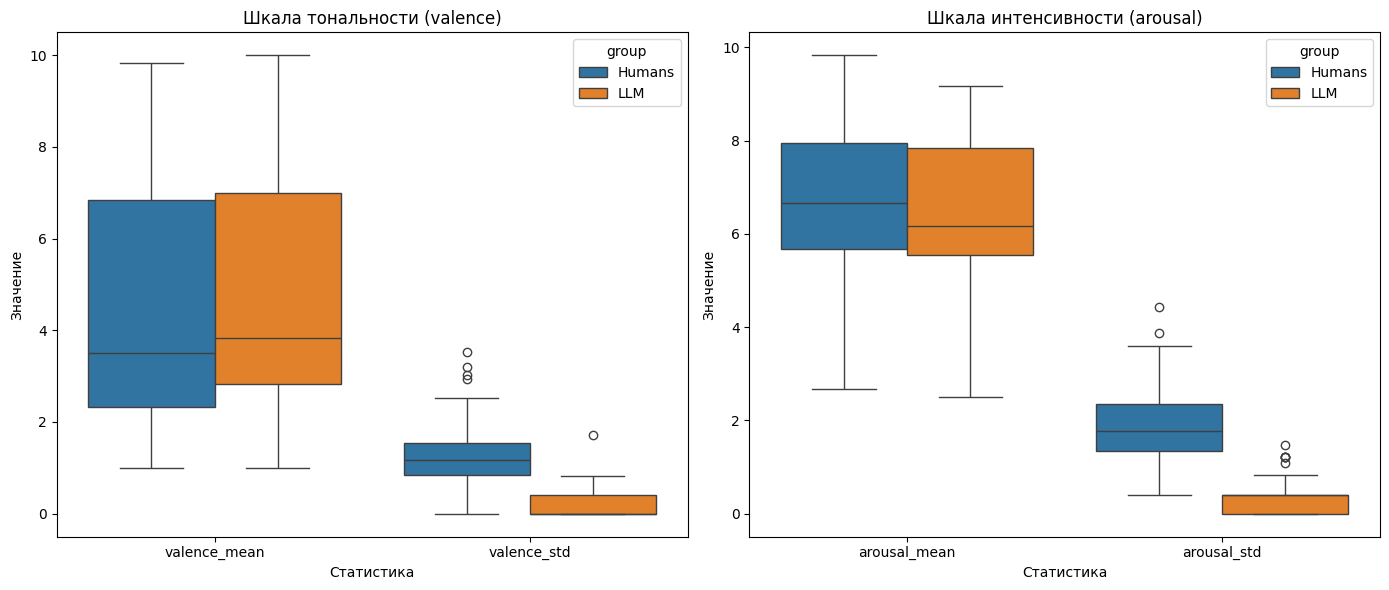

In [ ]:
valence_stats = ['valence_mean', 'valence_std']
arousal_stats = ['arousal_mean', 'arousal_std']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Объединяем данные по шкале тональности для Humans и LLM в один датафрейм для sns.boxplot
valence_data = pd.concat([
    data_humans[valence_stats].assign(group='Humans'),
    data_llm[valence_stats].assign(group='LLM')
], axis=0)

# Переименуем колонки для красоты (сделаем удобный формат для sns.boxplot с melt)
valence_data_melt = valence_data.melt(id_vars='group', var_name='statistic', value_name='value')

sns.boxplot(ax=axs[0], x='statistic', y='value', hue='group', data=valence_data_melt)
axs[0].set_title('Шкала тональности (valence)')
axs[0].set_xlabel('Статистика')
axs[0].set_ylabel('Значение')

# Аналогично для шкалы интенсивности
arousal_data = pd.concat([
    data_humans[arousal_stats].assign(group='Humans'),
    data_llm[arousal_stats].assign(group='LLM')
], axis=0)
arousal_data_melt = arousal_data.melt(id_vars='group', var_name='statistic', value_name='value')

sns.boxplot(ax=axs[1], x='statistic', y='value', hue='group', data=arousal_data_melt)
axs[1].set_title('Шкала интенсивности (arousal)')
axs[1].set_xlabel('Статистика')
axs[1].set_ylabel('Значение')

plt.tight_layout()
plt.show()


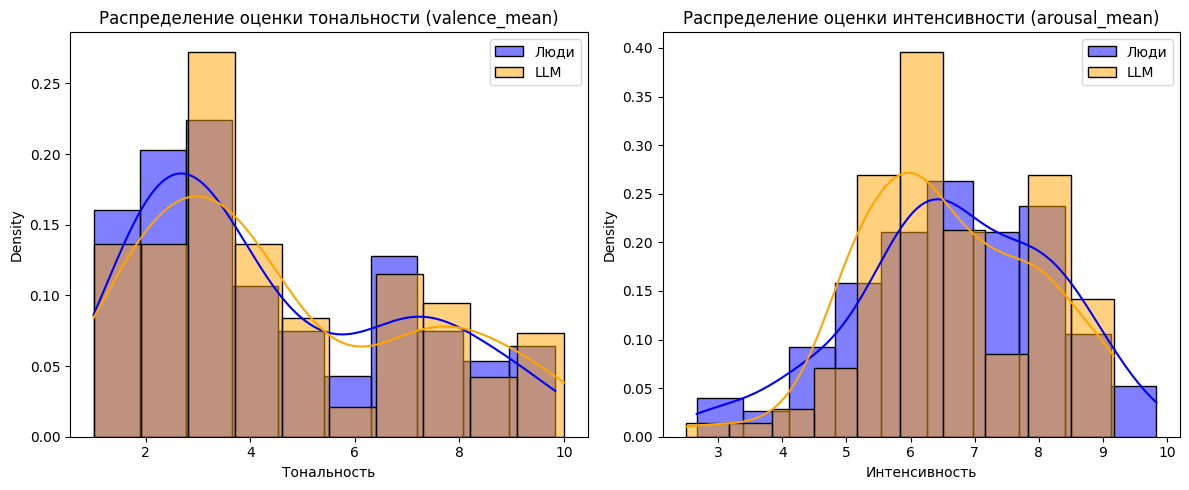

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_humans['valence_mean'], bins=10, kde=True, color='blue', label='Люди', stat='density')
sns.histplot(data_llm['valence_mean'], bins=10, kde=True, color='orange', label='LLM', stat='density', alpha=0.5)
plt.title('Распределение оценки тональности (valence_mean)')
plt.xlabel('Тональность')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data_humans['arousal_mean'], bins=10, kde=True, color='blue', label='Люди', stat='density')
sns.histplot(data_llm['arousal_mean'], bins=10, kde=True, color='orange', label='LLM', stat='density', alpha=0.5)
plt.title('Распределение оценки интенсивности (arousal_mean)')
plt.xlabel('Интенсивность')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
kappa_valence = cohen_kappa_score(data_humans['valence_mean'].round().astype('int64'), data_llm['valence_mean'].round().astype('int64'))
kappa_arousal = cohen_kappa_score(data_humans['arousal_mean'].round().astype('int64'), data_llm['arousal_mean'].round().astype('int64'))

print(f"Каппа Коэна для тональности: {kappa_valence:.3f}")
print(f"Каппа Коэна для интенсивности: {kappa_arousal:.3f}")

Каппа Коэна для тональности: 0.366
Каппа Коэна для интенсивности: 0.068


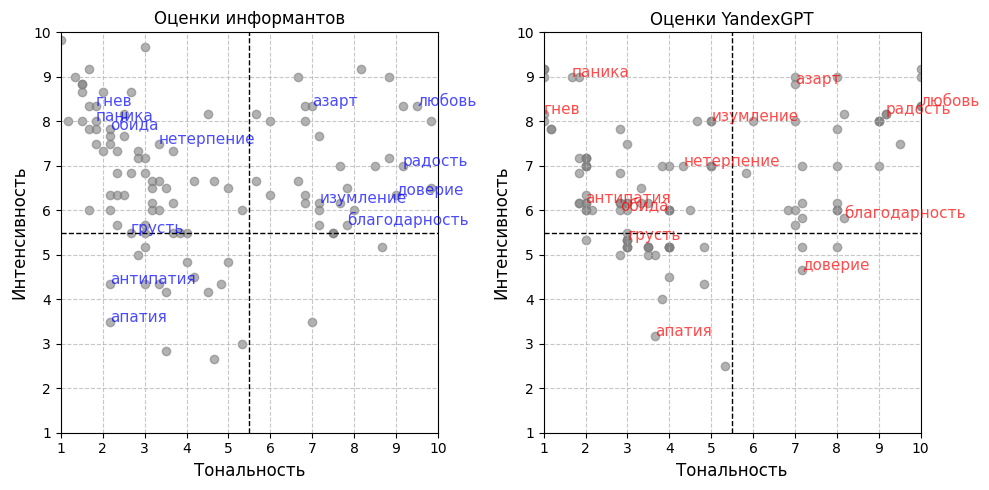

In [ ]:
# Пример списка эмоций, которые нужно подписать
target_words = ['апатия', 'азарт', 'благодарность',
                'гнев', 'грусть', 'доверие', 'изумление', 'любовь', 'нетерпение',
                'обида', 'паника', 'радость', 'антипатия']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Теперь ax1 — оценки информантов
ax1.scatter(data_humans['valence_mean'], data_humans['arousal_mean'], color='gray', alpha=0.6)

for i, row in data_humans.iterrows():
    if row['word'] in target_words:
        ax1.annotate(row['word'], (row['valence_mean'], row['arousal_mean']),
                     fontsize=11, color='blue', alpha=0.7)

ax1.axvline(x=5.5, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=5.5, color='black', linestyle='--', linewidth=1)
ax1.set_xlim(1, 10)
ax1.set_ylim(1, 10)
ax1.set_xlabel('Тональность', fontsize=12)
ax1.set_ylabel('Интенсивность', fontsize=12)
ax1.set_title('Оценки информантов', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# ax2 — оценки YandexGPT
ax2.scatter(data_llm['valence_mean'], data_llm['arousal_mean'], color='gray', alpha=0.6)

for i, row in data_llm.iterrows():
    if row['word'] in target_words:
        ax2.annotate(row['word'], (row['valence_mean'], row['arousal_mean']),
                     fontsize=11, color='red', alpha=0.7)

ax2.axvline(x=5.5, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=5.5, color='black', linestyle='--', linewidth=1)
ax2.set_xlim(1, 10)
ax2.set_ylim(1, 10)
ax2.set_xlabel('Тональность', fontsize=12)
ax2.set_ylabel('Интенсивность', fontsize=12)
ax2.set_title('Оценки YandexGPT', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


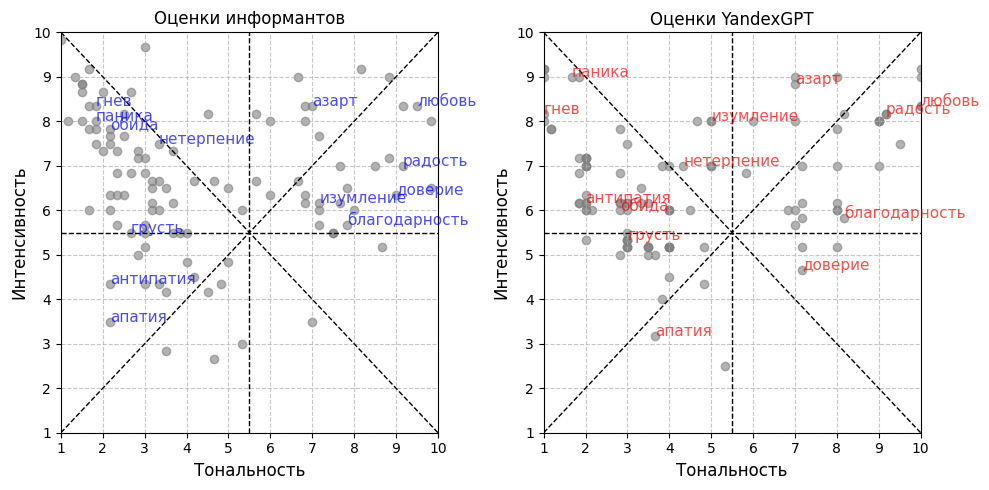

In [ ]:
import matplotlib.pyplot as plt

# Пример списка эмоций, которые нужно подписать
target_words = ['апатия', 'азарт', 'благодарность',
                'гнев', 'грусть', 'доверие', 'изумление', 'любовь', 'нетерпение',
                'обида', 'паника', 'радость', 'антипатия']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Теперь ax1 — оценки информантов
ax1.scatter(data_humans['valence_mean'], data_humans['arousal_mean'], color='gray', alpha=0.6)

for i, row in data_humans.iterrows():
    if row['word'] in target_words:
        ax1.annotate(row['word'], (row['valence_mean'], row['arousal_mean']),
                     fontsize=11, color='blue', alpha=0.7)

ax1.axvline(x=5.5, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=5.5, color='black', linestyle='--', linewidth=1)

# Диагональные линии крест-накрест для ax1
ax1.plot([1, 10], [1, 10], color='black', linestyle='--', linewidth=1)  # диагональ \
ax1.plot([1, 10], [10, 1], color='black', linestyle='--', linewidth=1)  # диагональ /

ax1.set_xlim(1, 10)
ax1.set_ylim(1, 10)
ax1.set_xlabel('Тональность', fontsize=12)
ax1.set_ylabel('Интенсивность', fontsize=12)
ax1.set_title('Оценки информантов', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# ax2 — оценки YandexGPT
ax2.scatter(data_llm['valence_mean'], data_llm['arousal_mean'], color='gray', alpha=0.6)

for i, row in data_llm.iterrows():
    if row['word'] in target_words:
        ax2.annotate(row['word'], (row['valence_mean'], row['arousal_mean']),
                     fontsize=11, color='red', alpha=0.7)

ax2.axvline(x=5.5, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=5.5, color='black', linestyle='--', linewidth=1)

# Диагональные линии крест-накрест для ax2
ax2.plot([1, 10], [1, 10], color='black', linestyle='--', linewidth=1)  # диагональ \
ax2.plot([1, 10], [10, 1], color='black', linestyle='--', linewidth=1)  # диагональ /

ax2.set_xlim(1, 10)
ax2.set_ylim(1, 10)
ax2.set_xlabel('Тональность', fontsize=12)
ax2.set_ylabel('Интенсивность', fontsize=12)
ax2.set_title('Оценки YandexGPT', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
def assign_class(df):
    center_x, center_y = 5.5, 5.5
    dx = df['valence_mean'] - center_x
    dy = df['arousal_mean'] - center_y
    angles = np.degrees(np.arctan2(dy, dx))  # от -180 до 180
    angles = (angles + 360) % 360  # нормируем к 0-360 градусам

    # Классы — 8 секторов по 45 градусов, нумерация против часовой от 0° (вправо)
    # Сектор 1: [0°, 45°), сектор 2: [45°, 90°), ..., сектор 8: [315°, 360°)
    df['class'] = (angles // 45 + 1).astype(int)
    return df

data_humans = assign_class(data_humans)
data_llm = assign_class(data_llm)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Объединяем по слову
df_compare = data_humans[['word', 'class']].merge(
    data_llm[['word', 'class']], on='word', suffixes=('_true', '_pred'))

y_true = df_compare['class_true']
y_pred = df_compare['class_pred']

# Точность
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.3f}")

# Подробный отчет
print("Classification report:")
print(classification_report(y_true, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cm)


Accuracy: 0.683
Classification report:
              precision    recall  f1-score   support

           1       0.73      0.84      0.78        19
           2       0.86      0.55      0.67        11
           3       0.40      0.33      0.36         6
           4       0.84      0.78      0.81        46
           5       0.43      0.64      0.51        14
           6       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1

    accuracy                           0.68       104
   macro avg       0.49      0.54      0.48       104
weighted avg       0.70      0.68      0.68       104

Confusion matrix:
[[16  0  1  0  0  0  0  2]
 [ 4  6  1  0  0  0  0  0]
 [ 1  0  2  2  1  0  0  0]
 [ 0  0  1 36  9  0  0  0]
 [ 0  0  0  4  9  1  0  0]
 [ 1  1  0  1  2  1  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.cluster import KMeans, SpectralClustering, AffinityPropagation, AgglomerativeClustering, DBSCAN # https://scikit-learn.org/stable/modules/clustering.html
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn import metrics # https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.feature_extraction.text import CountVectorizer # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import TfidfTransformer # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.decomposition import PCA # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html это снижение размерности

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
# Функция для настройки графика
def configure_plot(ax, x, y, c, title):
    ax.scatter(x=x, y=y, c=c)
    ax.axvline(x=5.5, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=5.5, color='black', linestyle='--', linewidth=1)
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.set_xlabel('Тональность', fontsize=14)
    ax.set_ylabel('Интенсивность', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

# Функция для отображения графика
def plot_data(X_humans, X_llm, predicted_humans, predicted_llm):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    configure_plot(ax1, X_llm.iloc[:, 0], X_llm.iloc[:, 1], predicted_llm, f'Оценки YandexGPT Kmeans при n_clusters={n}')

    configure_plot(ax2, X_humans.iloc[:, 0], X_humans.iloc[:, 1], predicted_humans, f'Оценки информантов Kmeans при n_clusters={n}')

    plt.tight_layout()
    plt.show()

# Функция для отображения графика c кластерами
def plot_data_clusters(X_humans, X_llm, predicted_humans, predicted_llm):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    configure_plot(ax1, X_llm.iloc[:, 0], X_llm.iloc[:, 1], predicted_llm, f'Оценки YandexGPT Kmeans при n_clusters={n}')
    sns.kdeplot(
        x=X_llm.iloc[:, 0], y=X_llm.iloc[:, 1], hue=predicted_llm,
        fill=True, alpha=0.3, levels=5, ax=ax1, palette='bright', linewidths=1
    )

    configure_plot(ax2, X_humans.iloc[:, 0], X_humans.iloc[:, 1], predicted_humans, f'Оценки информантов Kmeans при n_clusters={n}')
    sns.kdeplot(
        x=X_humans.iloc[:, 0], y=X_humans.iloc[:, 1], hue=predicted_humans,
        fill=True, alpha=0.3, levels=5, ax=ax2, palette='bright', linewidths=1
    )

    plt.tight_layout()
    plt.show()

In [ ]:
RANDOM_SEED = 42

In [ ]:
X_humans = data_humans[['valence_mean', 'arousal_mean']]
X_llm = data_llm[['valence_mean', 'arousal_mean']]

In [ ]:
kmeans_humans = KMeans(n_clusters=10, random_state=RANDOM_SEED)
predicted_humans = kmeans_humans.fit_predict(X_humans)

kmeans_llm = KMeans(n_clusters=10, random_state=RANDOM_SEED)
predicted_llm = kmeans_llm.fit_predict(X_llm)

<ipython-input-78-8ad0c98246ca>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


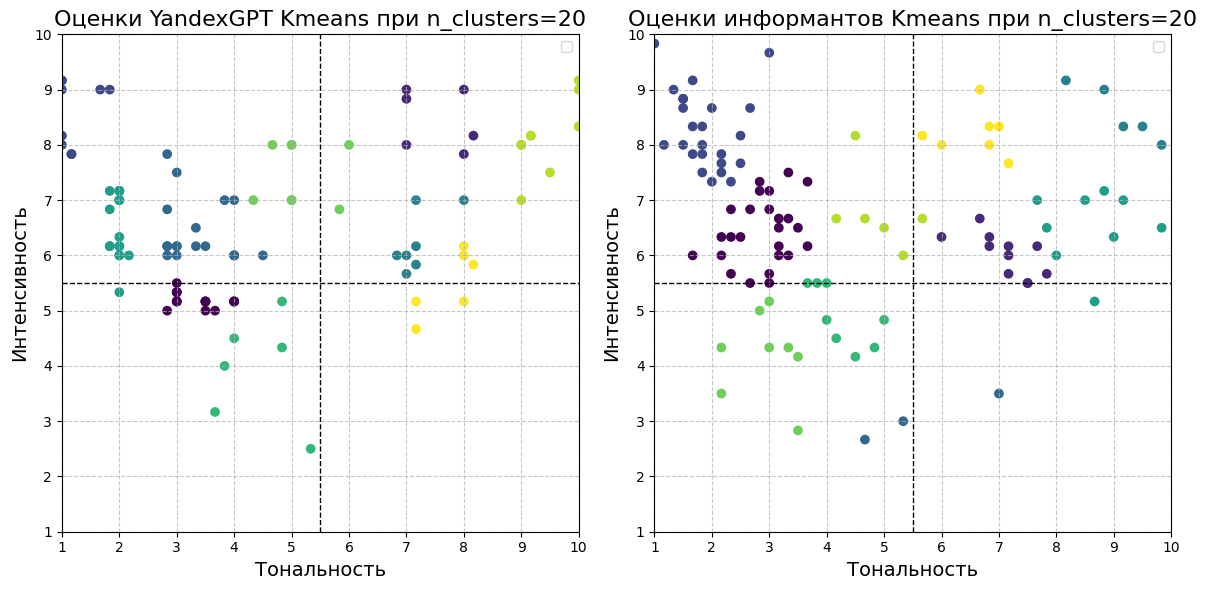

In [ ]:
plot_data(X_humans, X_llm, predicted_humans, predicted_llm)

In [ ]:
data_humans['cluster'] = predicted_humans

clustered_words = data_humans[['word', 'cluster']].sort_values('cluster')

for cluster_id, group in clustered_words.groupby('cluster'):
    words_list = ', '.join(group['word'])
    print(f"Кластер {cluster_id}: {words_list}")

Кластер 0: беспокойство, безнадежность, безысходность, горечь, недоумение, испуг, грусть, раскаяние, огорчение, опасение, оторопь, нежелание, нетерпение, недовольствие, неуверенность, неприятность, ревность, разочарование, печаль, переживание, прискорбие, стыд, смятение, скорбь, зависть
Кластер 1: удовлетворение, сострадание , трепет , сочувствие, облегчение, изумление, благодарность, удивление, задор, упоение, умиление
Кластер 2: презрение, потрясение, отвращение, отчаяние, озлобление, раздражение, ярость, мучение, бешенство, гнев, злорадство, злоба, тревога, ужас, страх, страдание, обида, ненависть, паника, ожесточение, омерзение, недовольство, негодование, неистовство
Кластер 3: задумчивость, спокойствие, беспамятство
Кластер 4: экстаз, влюбленность, восторг, счастье, любовь
Кластер 5: блаженство, доверие, наслаждение, восхищение, удовольствие, симпатия, уважение, признательность, радость
Кластер 6: нерешительность, меланхолия, неловкость, утешение, замешательство, сожаление, забыти

In [ ]:
data_llm['cluster'] = predicted_llm

clustered_words = data_llm[['word', 'cluster']].sort_values('cluster')

for cluster_id, group in clustered_words.groupby('cluster'):
    words_list = ', '.join(group['word'])
    print(f"Кластер {cluster_id}: {words_list}")

Кластер 0: досада, недовольство, конфуз, грусть, недовольствие, нерешительность, неприятность, прискорбие, печаль, огорчение, неуверенность, нежелание, неловкость, тоска, сожаление, смущение, уныние
Кластер 1: задор, страсть, возбуждение, раж, экзальтация, азарт
Кластер 2: ярость, ужас, неистовство, гнев, бешенство, ненависть, паника, злоба, возмущение
Кластер 3: раздражение, переживание, растерянность, зависть, замешательство, тревога, обида, оторопь, раскаяние, опасение, надрыв, недоумение, беспокойство, беспамятство, ревность, разочарование, смятение, стыд
Кластер 4: увлечение, гордость, облегчение, желание, сочувствие, сострадание, утешение
Кластер 5: отвращение, безнадежность, безысходность, презрение, антипатия, омерзение, отчаяние, мучение, негодование, горечь, испуг, скорбь, злорадство, страдание, страх, ожесточение, озлобление
Кластер 6: задумчивость, скука, меланхолия, апатия, спокойствие, жалость
Кластер 7: ажиотаж, изумление, потрясение, нетерпение, волнение, удивление, заб